# Instructions

As we have seen, there are many many ways to access data previously obtained with a ground-based or space-based telescope which were then subsequently stored within archives located in different places around the world.

In class, we overviewed only some of the vast array of archives and possibilities for accessing them. These included websites and their search tools and Python interfaces. Remember that this archival data ecosystem is functional, but far from ideal. One common problem is figuring out where among the many resources to get the data, and then exactly how to write the queries. The “virtual observatory” is supposed to solve all of our problems, though this ecosystem still operates like independent states rather than a federation. It is still amazing, though, what we can do what we can with just a few of the right keystrokes.

The exercises here are meant to give you some more experience sampling what is out there. Much like research, there is not necessarily a “right answer” to the questions, and there are many directions in which you could go beyond what is asked. Just do your best to demonstrate what you have explored and what you have learned. There are endless possibilities to explore by scrolling towards the bottom of the [Astroquery documentation](https://astroquery.readthedocs.io/en/latest/), including Solar System targets, stars, galaxies, as well as other types of query-able data such as line lists and ephemerides.

**BOLD** text indicates the output we expect to see for a question. You can use as many cells as you think are necessary for a question, but please do not remove any of the sections or instruction text (so the grader knows what you were trying to do!) Please make sure your methodology is clear, either through comments in the code and/or explicit variable and function names.

> **IMPORTANT!**<br>
> Once you have finished the problem set, reset the kernel and run all of the cells from top to bottom to ensure it works as you expect. We should be able to replicate your results on our own computers by only changing the path to the location of the data files. Don't forget that we also want to know how much total time you spent working on this problem set!

# Package Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.wcs import WCS

from astropy.coordinates import SkyCoord
from astropy import units as u


# Part I: Gaia

1. Use Astroquery’s interface to Gaia to query the Gaia DR2 (Data Release 2) catalog within $30^\prime$ of the position $\alpha=3^\mathrm{h}47^\mathrm{m}$ and $\delta=24^\circ 7^\prime 12^{\prime\prime}$. Documentation for `astroquery.gaia` is available [here](https://astroquery.readthedocs.io/en/latest/gaia/gaia.html). Limit your query to 100 rows. **Make two plots: a scatterplot of declination vs. right ascension and a scatterplot of proper motion in declination vs. proper motion in right ascension.** Make sure your axes are properly oriented and have labels including appropriate units!

In [4]:
from astroquery.gaia import Gaia

Gaia.ROW_LIMIT = 100  # Ensure the default row limit.
coord = SkyCoord(ra='03h47m', dec='+24 7 12', unit=(u.hourangle, u.deg), frame='icrs')
j = Gaia.cone_search_async(coord, radius=u.Quantity(0.5, u.deg)) # Half a degree = 30'
r = j.get_results()
r.pprint()

INFO: Query finished. [astroquery.utils.tap.core]
    solution_id            DESIGNATION         ...          dist        
                                               ...                      
------------------- -------------------------- ... ---------------------
1635721458409799680 Gaia DR2 65225812899613312 ... 0.0026597036308488075
1635721458409799680 Gaia DR2 65225920273742848 ...    0.0056760326447496
1635721458409799680 Gaia DR2 65225984700165248 ...  0.010571887509126781
1635721458409799680 Gaia DR2 65214061869072512 ...  0.012110160167749212
1635721458409799680 Gaia DR2 65225812899598976 ...  0.012554611627129711
1635721458409799680 Gaia DR2 65225920273226240 ...  0.012586317570514902
1635721458409799680 Gaia DR2 65225885913490048 ...  0.013213774427989882
1635721458409799680 Gaia DR2 65225950338575616 ...  0.014424669086052224
1635721458409799680 Gaia DR2 65225885914002688 ...  0.015415105234197177
1635721458409799680 Gaia DR2 65214066165454848 ...  0.016727119645967733
 

Text(0.5, 1.0, 'RA vs. Dec with 100 rows')

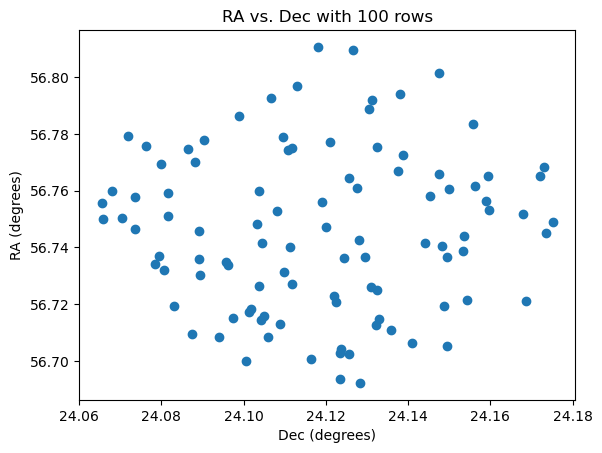

In [13]:
plt.scatter(r['dec'], r['ra'])
plt.xlabel("Dec (degrees)")
plt.ylabel("RA (degrees)")
plt.title("RA vs. Dec with 100 rows")

Text(0.5, 1.0, 'RA vs. PMRA with 100 rows')

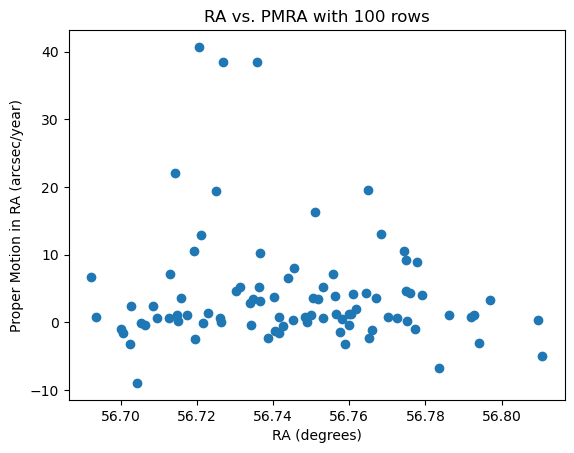

In [14]:
plt.scatter(r['ra'], r['pmra'])
plt.xlabel("RA (degrees)")
plt.ylabel("Proper Motion in RA (arcsec/year)")
plt.title("RA vs. PMRA with 100 rows")

2. Once you are happy with your query and your plots, increase the number of catalog lines returned in a systematic way and report how it changes your plots. **Show this however you see fit.** Explain what you see and speculate as to the cause. Consider both database and astronomical effects.

INFO: Query finished. [astroquery.utils.tap.core]
    solution_id            DESIGNATION         ...          dist        
                                               ...                      
------------------- -------------------------- ... ---------------------
1635721458409799680 Gaia DR2 65225812899613312 ... 0.0026597036308488075
1635721458409799680 Gaia DR2 65225920273742848 ...    0.0056760326447496
1635721458409799680 Gaia DR2 65225984700165248 ...  0.010571887509126781
1635721458409799680 Gaia DR2 65214061869072512 ...  0.012110160167749212
1635721458409799680 Gaia DR2 65225812899598976 ...  0.012554611627129711
1635721458409799680 Gaia DR2 65225920273226240 ...  0.012586317570514902
1635721458409799680 Gaia DR2 65225885913490048 ...  0.013213774427989882
1635721458409799680 Gaia DR2 65225950338575616 ...  0.014424669086052224
1635721458409799680 Gaia DR2 65225885914002688 ...  0.015415105234197177
1635721458409799680 Gaia DR2 65214066165454848 ...  0.016727119645967733
 

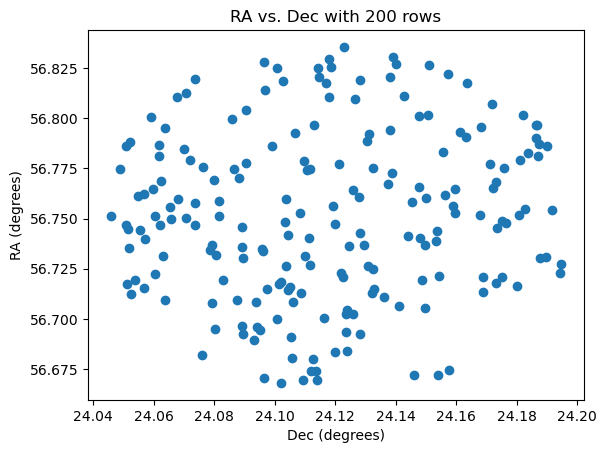

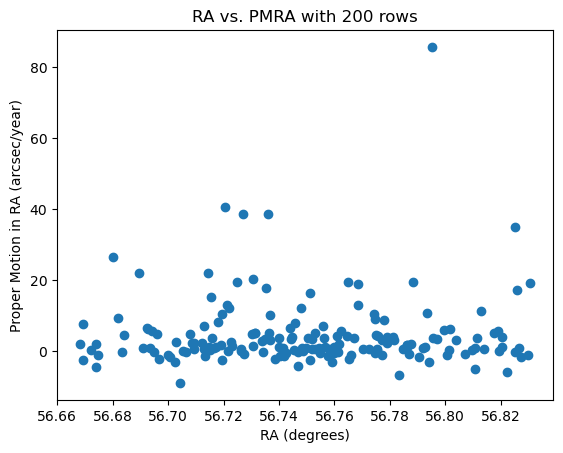

INFO: Query finished. [astroquery.utils.tap.core]
    solution_id            DESIGNATION         ...          dist        
                                               ...                      
------------------- -------------------------- ... ---------------------
1635721458409799680 Gaia DR2 65225812899613312 ... 0.0026597036308488075
1635721458409799680 Gaia DR2 65225920273742848 ...    0.0056760326447496
1635721458409799680 Gaia DR2 65225984700165248 ...  0.010571887509126781
1635721458409799680 Gaia DR2 65214061869072512 ...  0.012110160167749212
1635721458409799680 Gaia DR2 65225812899598976 ...  0.012554611627129711
1635721458409799680 Gaia DR2 65225920273226240 ...  0.012586317570514902
1635721458409799680 Gaia DR2 65225885913490048 ...  0.013213774427989882
1635721458409799680 Gaia DR2 65225950338575616 ...  0.014424669086052224
1635721458409799680 Gaia DR2 65225885914002688 ...  0.015415105234197177
1635721458409799680 Gaia DR2 65214066165454848 ...  0.016727119645967733
 

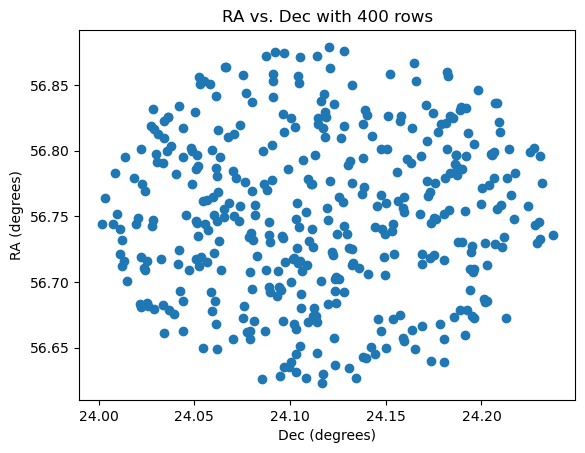

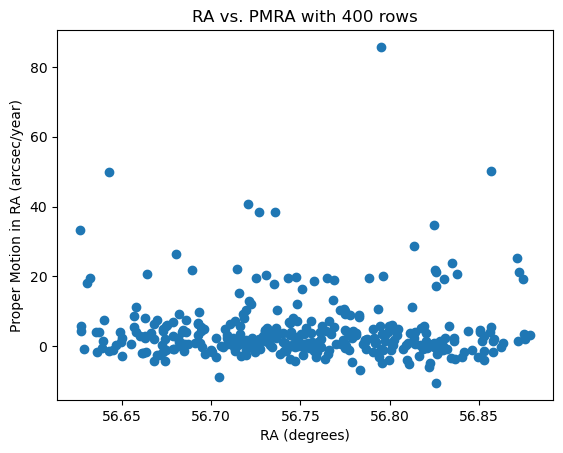

INFO: Query finished. [astroquery.utils.tap.core]
    solution_id            DESIGNATION         ...          dist        
                                               ...                      
------------------- -------------------------- ... ---------------------
1635721458409799680 Gaia DR2 65225812899613312 ... 0.0026597036308488075
1635721458409799680 Gaia DR2 65225920273742848 ...    0.0056760326447496
1635721458409799680 Gaia DR2 65225984700165248 ...  0.010571887509126781
1635721458409799680 Gaia DR2 65214061869072512 ...  0.012110160167749212
1635721458409799680 Gaia DR2 65225812899598976 ...  0.012554611627129711
1635721458409799680 Gaia DR2 65225920273226240 ...  0.012586317570514902
1635721458409799680 Gaia DR2 65225885913490048 ...  0.013213774427989882
1635721458409799680 Gaia DR2 65225950338575616 ...  0.014424669086052224
1635721458409799680 Gaia DR2 65225885914002688 ...  0.015415105234197177
1635721458409799680 Gaia DR2 65214066165454848 ...  0.016727119645967733
 

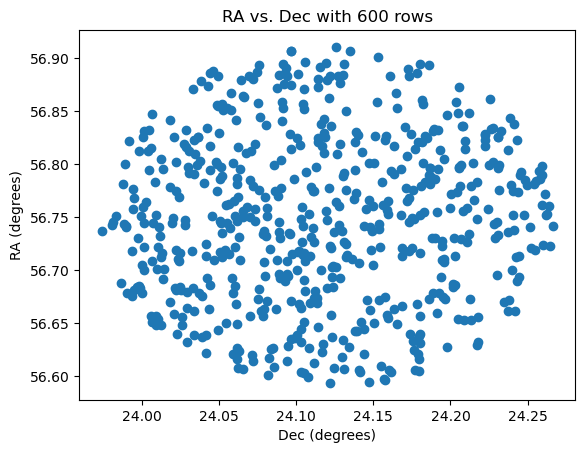

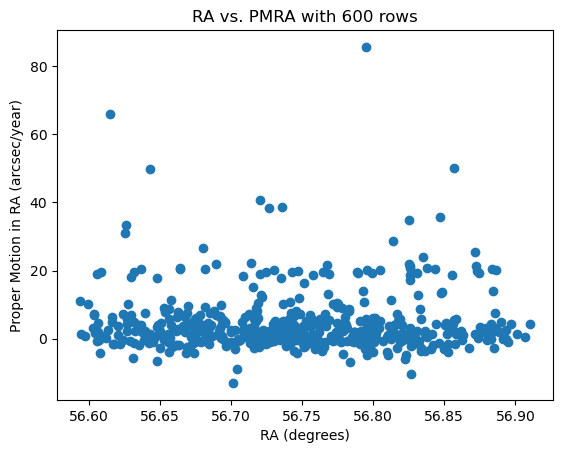

INFO: Query finished. [astroquery.utils.tap.core]
    solution_id            DESIGNATION         ...          dist        
                                               ...                      
------------------- -------------------------- ... ---------------------
1635721458409799680 Gaia DR2 65225812899613312 ... 0.0026597036308488075
1635721458409799680 Gaia DR2 65225920273742848 ...    0.0056760326447496
1635721458409799680 Gaia DR2 65225984700165248 ...  0.010571887509126781
1635721458409799680 Gaia DR2 65214061869072512 ...  0.012110160167749212
1635721458409799680 Gaia DR2 65225812899598976 ...  0.012554611627129711
1635721458409799680 Gaia DR2 65225920273226240 ...  0.012586317570514902
1635721458409799680 Gaia DR2 65225885913490048 ...  0.013213774427989882
1635721458409799680 Gaia DR2 65225950338575616 ...  0.014424669086052224
1635721458409799680 Gaia DR2 65225885914002688 ...  0.015415105234197177
1635721458409799680 Gaia DR2 65214066165454848 ...  0.016727119645967733
 

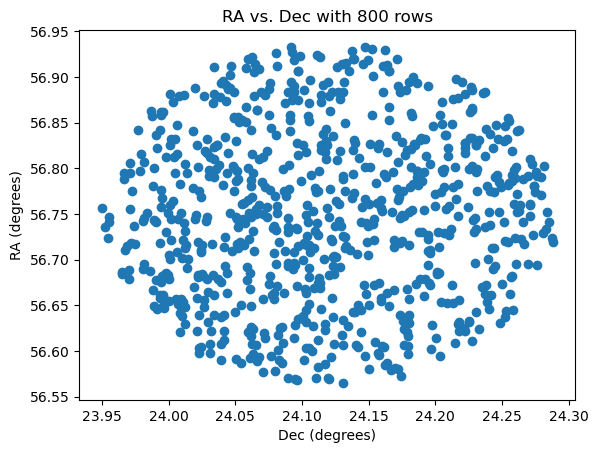

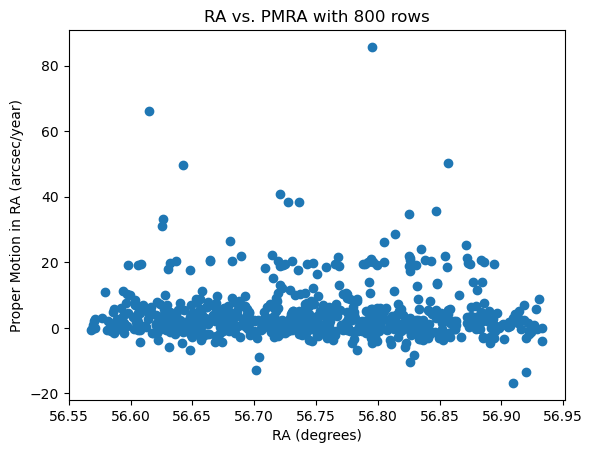

INFO: Query finished. [astroquery.utils.tap.core]
    solution_id            DESIGNATION         ...          dist        
                                               ...                      
------------------- -------------------------- ... ---------------------
1635721458409799680 Gaia DR2 65225812899613312 ... 0.0026597036308488075
1635721458409799680 Gaia DR2 65225920273742848 ...    0.0056760326447496
1635721458409799680 Gaia DR2 65225984700165248 ...  0.010571887509126781
1635721458409799680 Gaia DR2 65214061869072512 ...  0.012110160167749212
1635721458409799680 Gaia DR2 65225812899598976 ...  0.012554611627129711
1635721458409799680 Gaia DR2 65225920273226240 ...  0.012586317570514902
1635721458409799680 Gaia DR2 65225885913490048 ...  0.013213774427989882
1635721458409799680 Gaia DR2 65225950338575616 ...  0.014424669086052224
1635721458409799680 Gaia DR2 65225885914002688 ...  0.015415105234197177
1635721458409799680 Gaia DR2 65214066165454848 ...  0.016727119645967733
 

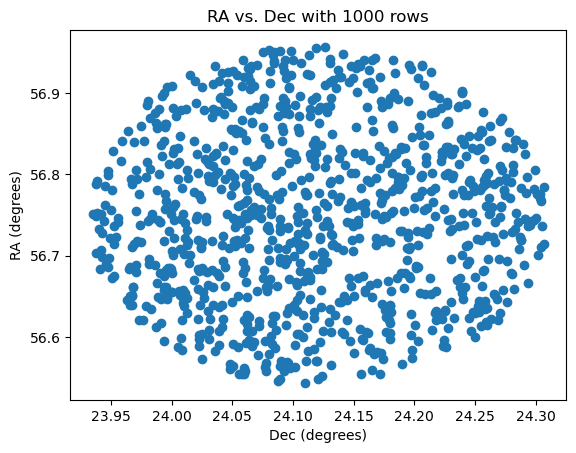

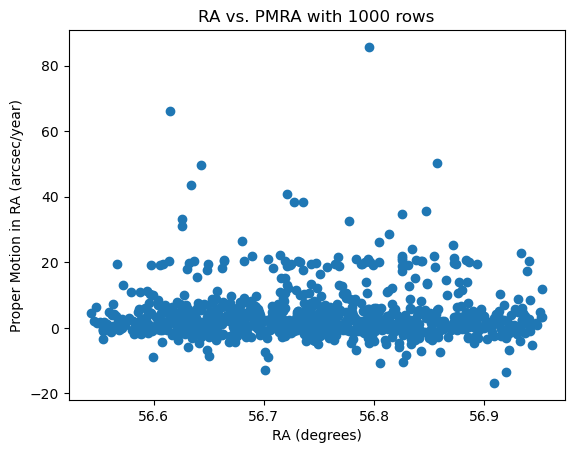

In [17]:
for lim in [200, 400, 600, 800, 1000]:
    Gaia.ROW_LIMIT = lim  # Ensure the default row limit.
    coord = SkyCoord(ra='03h47m', dec='+24 7 12', unit=(u.hourangle, u.deg), frame='icrs')
    j = Gaia.cone_search_async(coord, radius=u.Quantity(0.5, u.deg)) # Half a degree = 30'
    r = j.get_results()
    r.pprint()
    plt.figure(1)
    plt.scatter(r['dec'], r['ra'])
    plt.xlabel("Dec (degrees)")
    plt.ylabel("RA (degrees)")
    plt.title("RA vs. Dec with " + str(lim) + " rows")
    plt.show()
    plt.figure(2)
    plt.scatter(r['ra'], r['pmra'])
    plt.xlabel("RA (degrees)")
    plt.ylabel("Proper Motion in RA (arcsec/year)")
    plt.title("RA vs. PMRA with " + str(lim) + " rows")
    plt.show()
    

3. **Make the same plots as in question 1 again,** but this timer estrict the data to points that meet the following criteria:

$$\left|\frac{\delta\mu_\alpha}{\mu_\alpha}\right| < 0.10, \qquad \left|\frac{\delta\mu_\delta}{\mu_\delta}\right| < 0.10, \qquad \left|\mu_\alpha\right|>0, \quad\text{and}\quad \left|\mu_\delta\right|>0,$$

where $\mu$ is proper motion, $\delta\mu$ is the uncertainty in the proper motion, and $\mathrm{\alpha}$ and $\mathrm{\delta}$ as subscripts mean right ascension and declination, respectively. Also make sure that there are no NaNs or other non-finite values. How does this change your plots?

In [18]:
for column in Gaia.load_table('gaiadr2.gaia_source').columns:
  print(column.name)

Retrieving table 'gaiadr2.gaia_source'
solution_id
designation
source_id
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
astrometric_weight_al
astrometric_pseudo_colour
astrometric_pseudo_colour_error
mean_varpi_factor_al
astrometric_matched_observations
visibility_periods_used
astrometric_sigma5d_max
frame_rotator_object_type
matched_observations
duplicated_source
phot_g_n_obs
phot_g_mean_flux
phot_g_mean_flux_error
phot_g_mean_flux_over_error
phot_g_mean_mag
phot_bp_n_obs
phot_bp_mean_flux
phot_bp_mean_flux_error
phot_

INFO: Query finished. [astroquery.utils.tap.core]


/var/folders/00/tbcm6lzj09n7bcl9465xbgmr0000gn/T/ipykernel_37507/299805758.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  q = q.append({'dec': row['dec'], 'ra' : row['ra'], 'pmra' : row['pmra']}, ignore_index=True)


Text(0.5, 1.0, 'RA vs. PMRA with 100 rows')

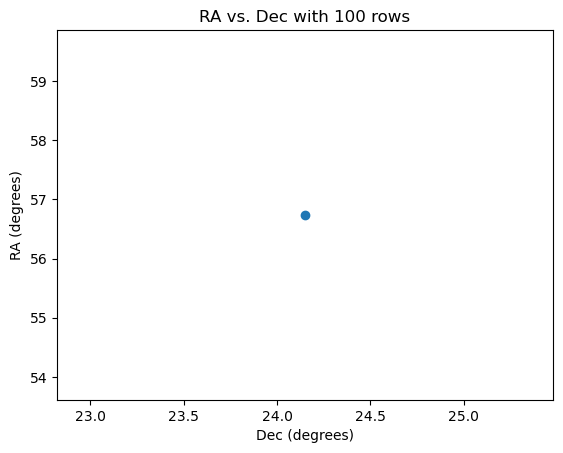

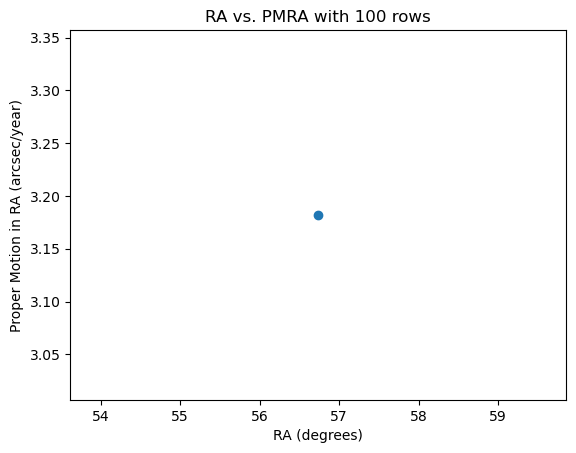

In [32]:
Gaia.ROW_LIMIT = 100  # Ensure the default row limit.
coord = SkyCoord(ra='03h47m', dec='+24 7 12', unit=(u.hourangle, u.deg), frame='icrs')
j = Gaia.cone_search_async(coord, radius=u.Quantity(0.5, u.deg)) # Half a degree = 30'
r = j.get_results()

q = pd.DataFrame(columns = ['dec', 'ra', 'pmra'])

for row in r:
    if row['pmra'] > 0 and row['pmdec'] > 0 and row['pmra_error'] / row['pmra'] < 0.1 and row['pmdec_error'] / row['dec'] < 0.1:
        q = q.append({'dec': row['dec'], 'ra' : row['ra'], 'pmra' : row['pmra']}, ignore_index=True)


plt.figure(1)
plt.scatter(q['dec'], q['ra'])
plt.xlabel("Dec (degrees)")
plt.ylabel("RA (degrees)")
plt.title("RA vs. Dec with 100 rows")

plt.figure(2)
plt.scatter(q['ra'], q['pmra'])
plt.xlabel("RA (degrees)")
plt.ylabel("Proper Motion in RA (arcsec/year)")
plt.title("RA vs. PMRA with 100 rows")

4. Using resources like [Aladin](https://aladin.u-strasbg.fr/AladinLite/) or [Simbad](https://simbad.u-strasbg.fr/simbad/), figure out what famous naked-eye object appears at or near the coordinates in question 1.

In [34]:
print("The object is the Pleiades")

The object is the Pleiades


5. Over what range of months can we observe this object for more than 2 hours per night from Palomar?

In [35]:
print("Using astro.swarthmore.edu airmass calculators, the Pleiades should be visible from Palomar for >2 hours. From August (3-5am) to March (7 to 10pm).")

Using astro.swarthmore.edu airmass calculators, the Pleiades should be visible from Palomar for >2 hours. From August (3-5am) to March (7 to 10pm).


# Part II: IRSA

IRSA is not a single mission, but a composite of archival mission data, primarily from infrared surveys. Docu- mentation for `astroquery.ipac.irsa` is available [here](https://astroquery.readthedocs.io/en/latest/ipac/irsa/irsa.html). Some major all-sky catalogs are the 2MASS near-infrared J-band, H-band and K-band (1 to 2 μm) photometry catalog, accessed as `fp_psc`, and the WISE mid-infrared W1, W2, W3 and W4 (3.6 to 22 μm) photometry catalog, accessed as`allwise_p3as_psd`.

6. Query both of these catalogs around a favorite position in the night sky. Figure out some of these columns, and **plot something astronomically sensible.**

    ra        dec         clon         clat     ...   angle     j_h   h_k   j_k 
   deg        deg                               ...    deg                      
---------- ---------- ------------ ------------ ... ---------- ----- ----- -----
 10.684737  41.269035 00h42m44.34s 41d16m08.53s ...   10.37715 0.785 0.193 0.978
 10.683469  41.268585 00h42m44.03s 41d16m06.91s ... 259.028985    --    --    --
 10.685657  41.269550 00h42m44.56s 41d16m10.38s ...  43.199247    --    --    --
 10.686026  41.269226 00h42m44.65s 41d16m09.21s ...  65.428627    --    --    --
 10.683465  41.269676 00h42m44.03s 41d16m10.83s ... 315.324334    --    --    --
 10.686015  41.269630 00h42m44.64s 41d16m10.67s ...  49.284403    --    --    --
 10.683263  41.267456 00h42m43.98s 41d16m02.84s ... 219.042553    --    --    --
 10.685270  41.267124 00h42m44.46s 41d16m01.65s ... 164.588393    --    --    --
 10.684180  41.266941 00h42m44.20s 41d16m00.99s ... 191.446346    --    --    --
 10.682383  41.267925 00h42m

Text(0.5, 1.0, 'RA and Dec of points around (121.1743, -21.5733)')

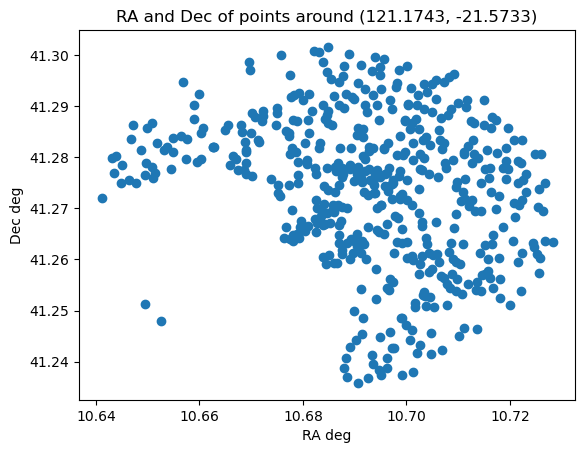

In [43]:
from astroquery.ipac.irsa import Irsa

# Stolen from docs
table = Irsa.query_region(SkyCoord(121.1743,
                          -21.5733, unit=(u.deg,u.deg),
                          frame='galactic'),
                          catalog='fp_psc', radius='0d2m0s')
print(table)

plt.scatter(table['ra'], table['dec'])
plt.xlabel("RA deg")
plt.ylabel("Dec deg")
plt.title("RA and Dec of points around (121.1743, -21.5733)")


# Part III: JPL Horizons

The JPL Horizons ephemeris service is the go-to service for astronomers seeking position information for Solar System bodies. Documentation for `astroquery.jplhorizons` is available [here](https://astroquery.readthedocs.io/en/latest/jplhorizons/jplhorizons.html). You can set an observer location, target body and time (or times), and get back an ephemeris table of positions, a vector table of position and velocity vectors, and an elements table of orbital elements.

7. Let's use the orbital elements make a plot of the Solar System on the day you were born. Make a Horizons query and get the orbital elements. You can convert orbital elements to Cartesian coordinates $x$, $y$ and $z$ with the following equations:<br><br>
\begin{align*}
r &= \frac{a(1-e^2)}{1 + e\cos(\nu)}\\
x &= r(\cos\Omega\cos(\omega + \nu)-\sin\Omega\sin(\omega + \nu)\cos i)\\
y &= r(\sin\Omega\cos(\omega + \nu)+\cos\Omega\sin(\omega + \nu)\cos i)\\
z &= r(\sin(\omega + \nu)\sin i)\\
\end{align*}<br>
where $a$ is the planet's semimajor axis, $e$ is its eccentricity, $\Omega$ is its longitude of ascending node, $\omega$ is its argument of periapsis, $i$ is its inclination and $\nu$ is its true anomaly. You can read up on orbital elements [here](https://en.wikipedia.org/wiki/Orbital_elements) if you are curious about what these variables are.<br><br>
When plotting the full orbital path, you will want to specify an array of angles spaced between $0$ and $2\pi$ for $\nu$. For placing the planets at their individual coordinates, you can use the value for $\nu$ returned by Horizons. Alternatively, you can plot their individual positions using the vectors returned by Horizons.<br><br>
Make two plots: one of the inner Solar System and one of the outer Solar System (they can be either 2D or 3D). **Plot the orbits of the planets and scatterplot their positions.** Don't forget to include the Sun! If Pluto was a "planet" at the time of your birth, you can include it, too!

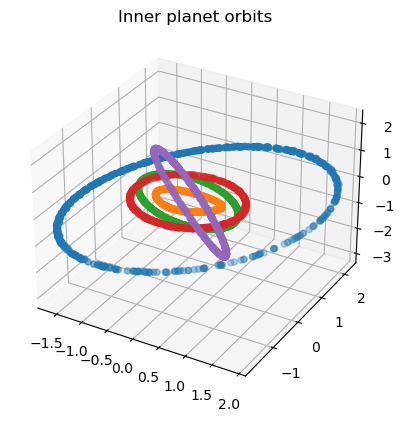

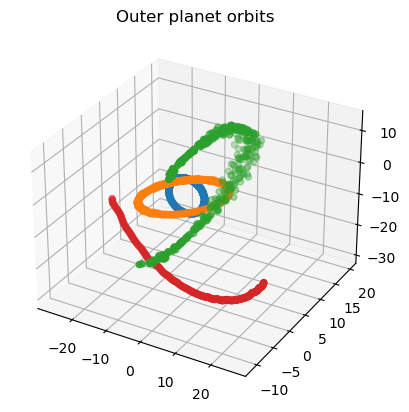

In [69]:
from astroquery.jplhorizons import Horizons

angles = np.linspace(0, 2*np.pi, 1000)


fig = plt.figure(1)
ax = plt.axes(projection='3d')
plt.title("Inner planet orbits")

for id in ['99', '199', '299', '399', '499']:

    # EDIT: ALL INNER PLANETS
    planet = Horizons(id=id, location='@SUN', epochs={'start':'2002-07-17', 'stop':'2003-07-17',
                        'step':'1d'})
    el = planet.elements()

    x_jup, y_jup, z_jup = [], [], []

    for row in el:
        r = row['a'] * (1 - row['e']**2) / (1 + row['e']*np.cos(row['nu']))
        x = r * (np.cos(row['Omega']) * np.cos(row['w'] + row['nu'])) - np.sin(row['Omega']) * np.sin(row['w'] + row['nu']) * np.cos(row['incl'])
        y = r * (np.sin(row['Omega']) * np.cos(row['w'] + row['nu'])) + np.cos(row['Omega']) * np.sin(row['w'] + row['nu']) * np.cos(row['incl'])
        z = r * np.sin(row['w'] + row['nu']) * np.sin(row['incl'])
        x_jup.append(x)
        y_jup.append(y)
        z_jup.append(z)

    ax.scatter3D(x_jup, y_jup, z_jup);

fig = plt.figure(2)
ax = plt.axes(projection='3d')
plt.title("Outer planet orbits")

for id in ['599', '699', '799', '899']:

    # EDIT: ALL INNER PLANETS
    planet = Horizons(id=id, location='@SUN', epochs={'start':'2002-07-17', 'stop':'2003-07-17',
                        'step':'1d'})
    el = planet.elements()

    x_jup, y_jup, z_jup = [], [], []

    for row in el:
        r = row['a'] * (1 - row['e']**2) / (1 + row['e']*np.cos(row['nu']))
        x = r * (np.cos(row['Omega']) * np.cos(row['w'] + row['nu'])) - np.sin(row['Omega']) * np.sin(row['w'] + row['nu']) * np.cos(row['incl'])
        y = r * (np.sin(row['Omega']) * np.cos(row['w'] + row['nu'])) + np.cos(row['Omega']) * np.sin(row['w'] + row['nu']) * np.cos(row['incl'])
        z = r * np.sin(row['w'] + row['nu']) * np.sin(row['incl'])
        x_jup.append(x)
        y_jup.append(y)
        z_jup.append(z)

    ax.scatter3D(x_jup, y_jup, z_jup);


8. The `epochs` keyword accepts times as a single Julian date, a small list of Julian dates, or a dictionary defining a start time, a stop time and a timestep. Let's use this last form to look at how the position of Venus changes over the year. Make a Horizons query of Venus from January 1, 2023 to December 31, 2023 in 1-day timesteps. For the location, figure out the latitude, longitude and approximate altitude of the Cahill roof. **Plot the change in its right ascension and declination over the year. Mark the locations of the solstices and equinoxes.** Is Venus at the same coordinates after one year? If not, explain why. Make sure your axes are labeled correctly and properly oriented!

Venus is not at the same coordinates after one year, the periods of Earth and Venus are not the same!


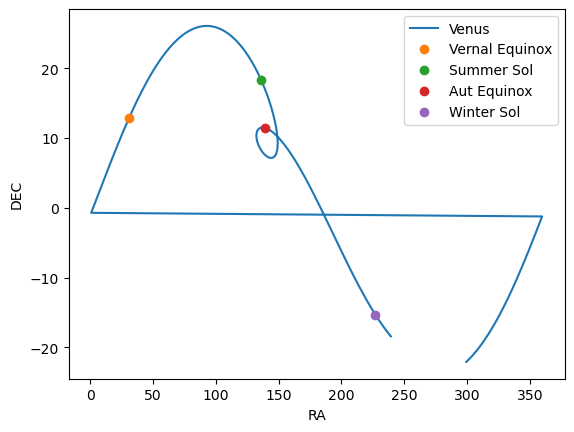

In [106]:
cahill = {'lon': -118.1253,
                     'lat': 34.1377,
                     'elevation' : 232}

venus = Horizons(id='299', location=cahill, epochs={'start':'2023-01-01', 'stop':'2023-12-31',
                        'step':'1d'})
venus_elem = venus.ephemerides()

for row in venus_elem:
    if row['datetime_str'].split(" ")[0] == "2023-Mar-20":
        ver_eq_ra, ver_eq_dec = row['RA'], row['DEC']
    if row['datetime_str'].split(" ")[0] == "2023-Jun-21":
        sum_sol_ra, sum_sol_dec = row['RA'], row['DEC']
    if row['datetime_str'].split(" ")[0] == "2023-Sep-23":
        aut_eq_ra, aut_eq_dec = row['RA'], row['DEC']
    if row['datetime_str'].split(" ")[0] == "2023-Dec-21":
        win_sol_ra, win_sol_dec = row['RA'], row['DEC']
    

plt.plot(venus_elem['RA'], venus_elem['DEC'])
plt.plot(ver_eq_ra, ver_eq_dec, 'o')
plt.plot(sum_sol_ra, sum_sol_dec, 'o')
plt.plot(aut_eq_ra, aut_eq_dec, 'o')
plt.plot(win_sol_ra, win_sol_dec, 'o')
plt.legend(["Venus", "Vernal Equinox", "Summer Sol", "Aut Equinox", "Winter Sol"])
plt.xlabel("RA")
plt.ylabel("DEC")

print('Venus is not at the same coordinates after one year, the periods of Earth and Venus are not the same!')

9. The small telescopes assignment asked you to observe Venus first thing because it was near the dusk horizon. **Plot Venus's altitude at sunset every day from April 3rd through June 9th.** Did our ability to observe Venus get better or worse over the quarter?

> **NOTE**<br>
> You can use Astroplan for answering this question. It will be particularly useful for finding the time of sunset for each day in the given timespan. Check the documentation for the `Observer` class [here](https://astroplan.readthedocs.io/en/latest/api/astroplan.Observer.html). You probably won't be able to query Horizons with a list of Julian dates because it will be too long, so you will have to do single queries in a loop. However, if you discover a more elegant solution, please show us!*

In [107]:
print(venus_elem.columns)

<TableColumns names=('targetname','datetime_str','datetime_jd','solar_presence','flags','RA','DEC','RA_app','DEC_app','RA_rate','DEC_rate','AZ','EL','AZ_rate','EL_rate','sat_X','sat_Y','sat_PANG','siderealtime','airmass','magextinct','V','surfbright','illumination','illum_defect','sat_sep','sat_vis','ang_width','PDObsLon','PDObsLat','PDSunLon','PDSunLat','SubSol_ang','SubSol_dist','NPole_ang','NPole_dist','EclLon','EclLat','r','r_rate','delta','delta_rate','lighttime','vel_sun','vel_obs','elong','elongFlag','alpha','lunar_elong','lunar_illum','sat_alpha','sunTargetPA','velocityPA','OrbPlaneAng','constellation','TDB-UT','ObsEclLon','ObsEclLat','NPole_RA','NPole_DEC','GlxLon','GlxLat','solartime','earth_lighttime','RA_3sigma','DEC_3sigma','SMAA_3sigma','SMIA_3sigma','Theta_3sigma','Area_3sigma','RSS_3sigma','r_3sigma','r_rate_3sigma','SBand_3sigma','XBand_3sigma','DoppDelay_3sigma','true_anom','hour_angle','alpha_true','PABLon','PABLat')>


Text(0.5, 1.0, 'Venus altitude starting apr 3')

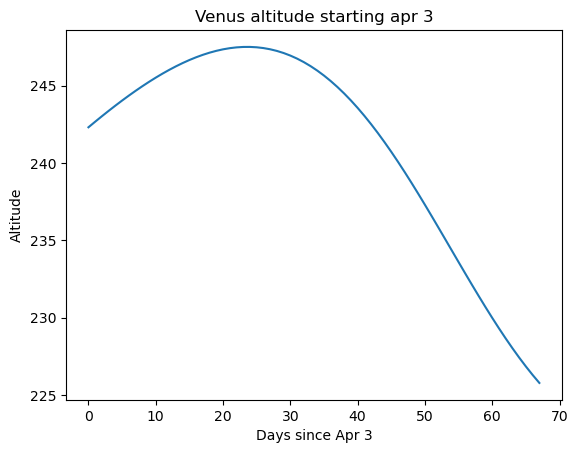

In [125]:
from astropy.time import Time
from astroplan import Observer
from astropy.coordinates import EarthLocation
import astropy.units as u

venus = Horizons(id='299', location=cahill, epochs={'start':'2023-04-03', 'stop':'2023-06-09',
                        'step':'1d'})
venus_elem = venus.ephemerides()


obs = Observer(longitude=-118.1445*u.deg, latitude=34.1478*u.deg,
                  elevation=0*u.m, name="Subaru", timezone='US/Pacific')

def mapped(datestr):
    datestr = datestr.replace("Jan", "01")
    datestr = datestr.replace("Feb", "02")
    datestr = datestr.replace("Mar", "03")
    datestr = datestr.replace("Apr", "04")
    datestr = datestr.replace("May", "05")
    datestr = datestr.replace("Jun", "06")
    datestr = datestr.replace("Jul", "07")
    datestr = datestr.replace("Aug", "08")
    datestr = datestr.replace("Sep", "09")
    datestr = datestr.replace("Oct", "10")
    datestr = datestr.replace("Nov", "11")
    datestr = datestr.replace("Dec", "12")
    return datestr

sunsets = set()
alts = []

for row in venus_elem:
    time_str = str(row['datetime_str'])
    time_str = mapped(time_str)
    time = Time(time_str)
    sunset_time = obs.sun_set_time(time)
    if sunset_time not in sunsets:
        sunsets.add(sunset_time)
        alts.append(row['AZ'])


plt.plot(alts)
plt.xlabel("Days since Apr 3")
plt.ylabel("Altitude")
plt.title("Venus altitude starting apr 3")
    

10. How much time did you spent working on this problem set (including time spent in office hours)?

In [36]:
print("~5 hours!")

~5 hours!
